# Harmonizing Community Boundaries

the `Community` object is geosnap's central data structure. A `Community` is a dataset that stores information about a collection of neighborhoods over several time periods, including each neighborhood's physical, socioeconomic, and demographic attributes and its demarcated boundaries. Under the hood, each `Community` is simply a long-form geopandas geodataframe with some associated metadata. 

If you're working with built-in data, you instantiate a `Community` by choosing the constructor for your dataset and passing either a boundary (geodataframe) or a selection filter that defines the study area. The selection filter can be either a `GeoDataFrame` boundary or a set of [FIPS](https://www.policymap.com/2012/08/tips-on-fips-a-quick-guide-to-geographic-place-codes-part-iii/) codes. Boundary queries are often more convenient but they are  more expensive to compute and will take longer to construct.

When constructing `Community`s from fips codes, the constructor has arguments for state, county, msa, or list of any arbitrary fips codes. If more than one of these arguments is passed, geosnap will use the union. This means that each level of the hierarchy is available for convenience but you are free to mix and match msas, states, counties, and even single tracts to create your study region of choice

If you're working with your own data, you instantiate a `Community` by passing a list of geodataframes (or a single long-form).

In [1]:
from geosnap.data import Community

## Create a `Community` from built-in census data

The quickest and easiest method for getting started is to instantiate a Community using the built-in census data. To do so, you use the `Community.from_census` constructor:

In [2]:
Community.from_census?

Signature:
Community.from_census(
    state_fips=None,
    county_fips=None,
    msa_fips=None,
    fips=None,
    boundary=None,
    years=[1990, 2000, 2010],
)
Docstring:
Create a new Community from original vintage US Census data.

   Instiantiate a new Community from . To use
   you must first download and register census data with geosnap using
   the `store_census` function. Pass lists of states, counties, or any
   arbitrary FIPS codes to create a community. All fips code arguments
   are additive, so geosnap will include the largest unique set.
   Alternatively, you may provide a boundary to use as a clipping
   feature.

Parameters
----------
state_fips : list or str
    string or list of strings of two-digit fips codes defining states
    to include in the study area.
county_fips : list or str
    string or list of strings of five-digit fips codes defining
    counties to include in the study area.
msa_fips : type
    string or list of strings of fips codes defining
    MSAs 

In [3]:
from geosnap.data import data_store

In [4]:
msas = data_store.msa_definitions
msas[msas['State Name']=='California']

,CBSA Code,Metropolitan Division Code,CSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Metropolitan Division Title,CSA Title,County/County Equivalent,State Name,FIPS State Code,FIPS County Code,Central/Outlying County,stcofips
142,12540,NaN,NaN,"Bakersfield, CA",Metropolitan Statistical Area,None,None,Kern County,California,06,029,Central,06029
355,17020,NaN,NaN,"Chico, CA",Metropolitan Statistical Area,None,None,Butte County,California,06,007,Central,06007
381,17340,NaN,NaN,"Clearlake, CA",Micropolitan Statistical Area,None,None,Lake County,California,06,033,Central,06033
450,18860,NaN,NaN,"Crescent City, CA",Micropolitan Statistical Area,None,None,Del Norte County,California,06,015,Central,06015
555,20940,NaN,NaN,"El Centro, CA",Metropolitan Statistical Area,None,None,Imperial County,California,06,025,Central,06025
581,21700,NaN,NaN,"Eureka-Arcata, CA",Micropolitan Statistical Area,None,None,Humboldt County,California,06,023,Central,06023
638,23420,NaN,260.0,"Fresno, CA",Metropolitan Statistical Area,None,"Fresno-Madera-Hanford, CA",Fresno County,California,06,019,Central,06019
714,25260,NaN,260.0,"Hanford-Corcoran, CA",Metropolitan Statistical Area,None,"Fresno-Madera-Hanford, CA",Kings County,California,06,031,Central,06031
996,31080,11244.0,348.0,"Los Angeles-Long Beach-Anaheim, CA",Metropolitan Statistical Area,"Anaheim-Santa Ana-Irvine, CA","Los Angeles-Long Beach, CA",Orange County,California,06,059,Central,06059
997,31080,31084.0,348.0,"Los Angeles-Long Beach-Anaheim, CA",Metropolitan Statistical Area,"Los Angeles-Long Beach-Glendale, CA","Los Angeles-Long Beach, CA",Los Angeles County,California,06,037,Central,06037


In [5]:
riverside = Community.from_census(fips='06065')

In [6]:
riverside.gdf.head()

,geoid,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_total_housing_units,n_vacant_housing_units,n_occupied_housing_units,n_owner_occupied_housing_units,n_renter_occupied_housing_units,n_white_persons,...,p_irish_born_pop,p_italian_born_pop,p_poverty_rate_children,p_poverty_rate_hispanic,p_russian_born_pop,p_scandanavian_born_pop,p_scandanavian_pop,n_total_pop_sample,p_female_labor_force,p_black_persons
3573,06065045800,2959.0,3.0,11.0,1549.0,893.0,656.0,418.0,238.0,1964646.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3864,06065040100,4178.0,18.0,28.0,2011.0,174.0,1837.0,1492.0,345.0,29861129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3867,06065044100,8383.0,5.0,24.0,4443.0,348.0,4095.0,2809.0,1286.0,7605976.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3869,06065043806,4246.0,2.0,4.0,2550.0,489.0,2061.0,1746.0,315.0,3556412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3870,06065044501,7359.0,12.0,18.0,7347.0,3309.0,4038.0,3373.0,665.0,7132740.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# create a little helper function for plotting a time-series

import matplotlib.pyplot as plt

def plot(community, column):
    fig, axs = plt.subplots(1,3, figsize=(15,5))
    axs=axs.flatten()

    community.gdf[community.gdf.year==1990].dropna(subset=[column]).plot(column=column, scheme='quantiles', cmap='Blues', k=6, ax=axs[0])
    axs[0].axis('off')
    axs[0].set_title('1990')

    community.gdf[community.gdf.year==2000].dropna(subset=[column]).plot(column=column, scheme='quantiles', cmap='Blues', k=6, ax=axs[1])
    axs[1].axis('off')
    axs[1].set_title('2000')

    community.gdf[community.gdf.year==2010].dropna(subset=[column]).plot(column=column, scheme='quantiles', cmap='Blues', k=6, ax=axs[2])
    axs[2].axis('off')
    axs[2].set_title('2010')

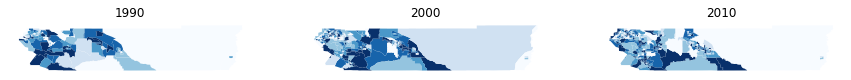

In [8]:
plot(riverside, 'n_occupied_housing_units')

In [9]:
for year in [1990, 2000, 2010]:
    print(riverside.gdf.groupby('year').count())

      geoid  n_mexican_pop  n_cuban_pop  n_puerto_rican_pop  \
year                                                          
1990    124            124          124                 124   
2000    343            343          343                 343   
2010    453            453          453                 453   

      n_total_housing_units  n_vacant_housing_units  n_occupied_housing_units  \
year                                                                            
1990                    124                     124                       124   
2000                    343                     343                       343   
2010                    453                     453                       453   

      n_owner_occupied_housing_units  n_renter_occupied_housing_units  \
year                                                                    
1990                             124                              124   
2000                             343                       

In [10]:
extensive =["n_occupied_housing_units"]

In [11]:
import copy
rc = copy.copy(riverside)

In [12]:
rc2000h = rc.harmonize(target_year=2000, weights_method='area', extensive_variables=extensive)

In [13]:
rc2000h.gdf.shape

(1029, 4)

In [14]:
rc9000 = rc2000h.gdf[rc2000h.gdf.year==1990] # pull out 1990 values in 2000 tracts

In [15]:
riverside.gdf.shape

(920, 195)

In [16]:
rc9090 = rc.gdf[rc.gdf.year==1990] # 1990 in original 1990 tracts

In [17]:
rc9000.head()

,geoid,geometry,n_occupied_housing_units,year
0,06065010000,"(POLYGON ((-116.488946 33.830418, -116.490946 ...",1064.169475,1990
1,06065010100,"POLYGON ((-116.52919 33.815971, -116.530056 33...",801.129134,1990
2,06065010200,"(POLYGON ((-116.585148 33.844917, -116.580248 ...",1002.899646,1990
3,06065010300,"POLYGON ((-116.510647 33.805019, -116.510647 3...",1116.675151,1990
4,06065010400,"POLYGON ((-116.528352 33.799493, -116.528232 3...",39.388030,1990


In [18]:
rc9090.shape

(124, 195)

In [19]:
rc9090.head()

,geoid,n_mexican_pop,n_cuban_pop,n_puerto_rican_pop,n_total_housing_units,n_vacant_housing_units,n_occupied_housing_units,n_owner_occupied_housing_units,n_renter_occupied_housing_units,n_white_persons,...,p_irish_born_pop,p_italian_born_pop,p_poverty_rate_children,p_poverty_rate_hispanic,p_russian_born_pop,p_scandanavian_born_pop,p_scandanavian_pop,n_total_pop_sample,p_female_labor_force,p_black_persons
3573,06065045800,2959.0,3.0,11.0,1549.0,893.0,656.0,418.0,238.0,1964646.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3864,06065040100,4178.0,18.0,28.0,2011.0,174.0,1837.0,1492.0,345.0,29861129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3867,06065044100,8383.0,5.0,24.0,4443.0,348.0,4095.0,2809.0,1286.0,7605976.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3869,06065043806,4246.0,2.0,4.0,2550.0,489.0,2061.0,1746.0,315.0,3556412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3870,06065044501,7359.0,12.0,18.0,7347.0,3309.0,4038.0,3373.0,665.0,7132740.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## select based on bb of area of interest

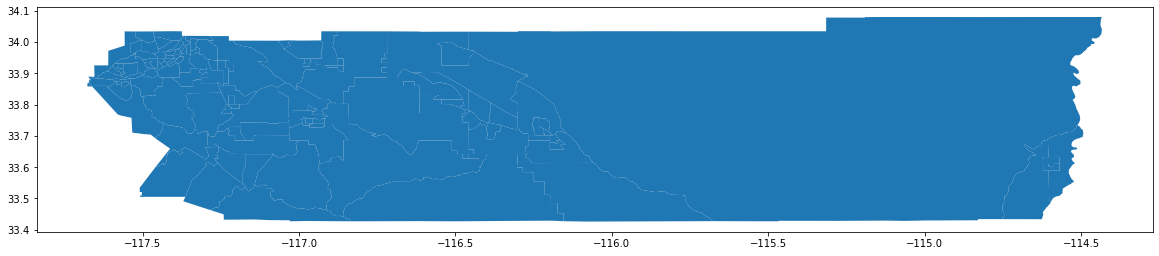

In [20]:
rc9090.plot(figsize=(20,20))

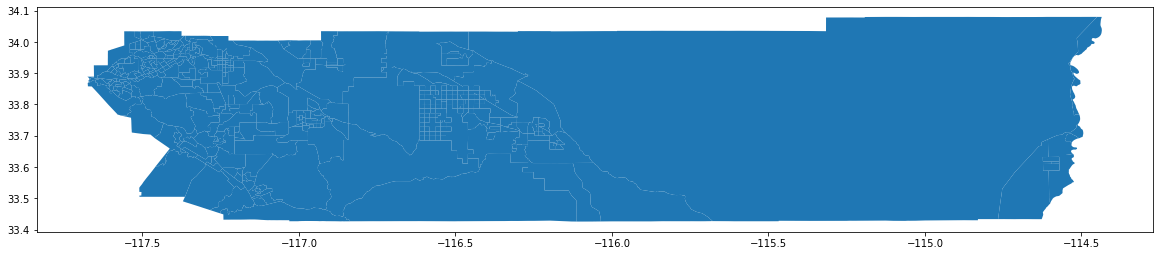

In [21]:
rc9000.plot(figsize=(20,20))

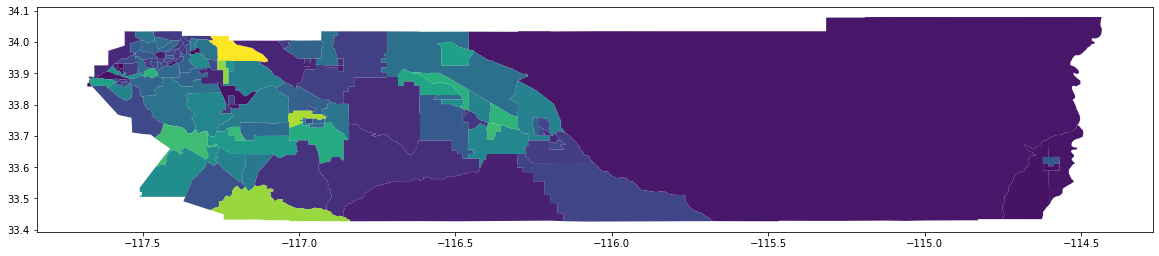

In [22]:
rc9090.plot(figsize=(20,20), column='n_occupied_housing_units')

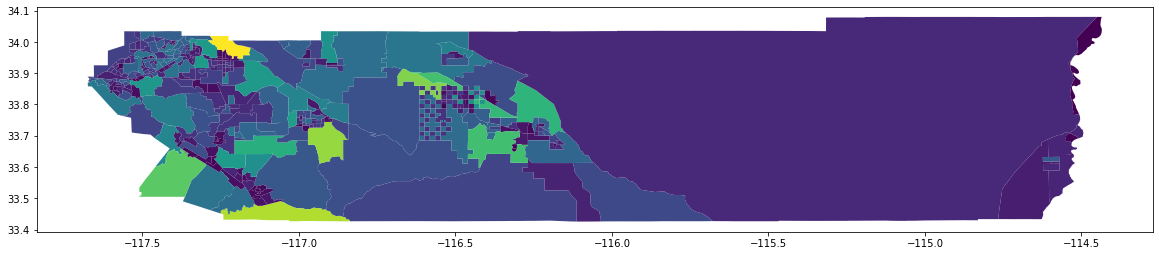

In [23]:
rc9000.plot(figsize=(20,20), column='n_occupied_housing_units')

In [24]:
import mapclassify as mc
rc9090.n_occupied_housing_units.max()

11058.0

In [25]:
rc9000.n_occupied_housing_units.max()

6355.083162493043

In [26]:
q5 = mc.Quantiles(rc9090.n_occupied_housing_units, k=5)
q5

                  Quantiles                   
 
  Lower              Upper               Count
            x[i] <=  1610.200               25
 1610.200 < x[i] <=  2237.600               25
 2237.600 < x[i] <=  3397.000               24
 3397.000 < x[i] <=  4859.600               25
 4859.600 < x[i] <= 11058.000               25

In [27]:
q5.bins

array([ 1610.2,  2237.6,  3397. ,  4859.6, 11058. ])

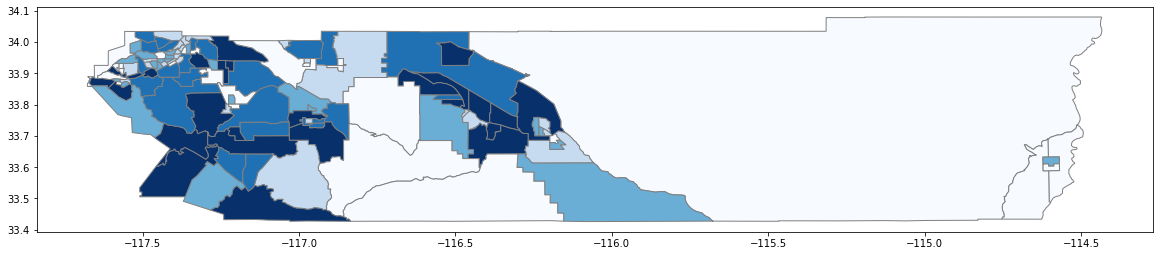

In [28]:

rc9090.plot(figsize=(20,20), column='n_occupied_housing_units', cmap='Blues',
             edgecolor='gray', scheme='UserDefined',
             classification_kwds={'bins':q5.bins})


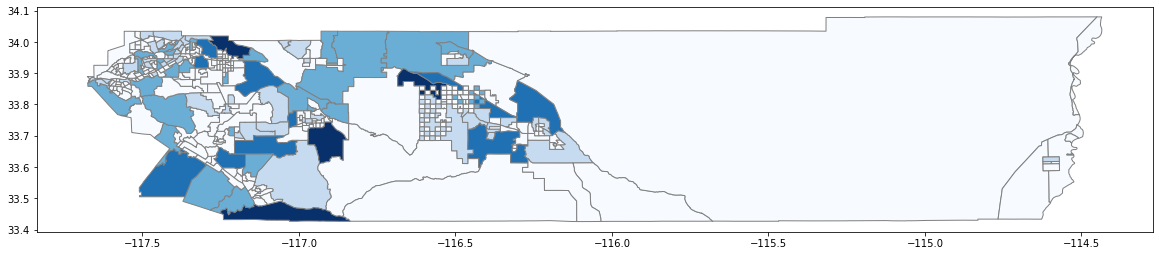

In [29]:

rc9000.plot(figsize=(20,20), column='n_occupied_housing_units', cmap='Blues',
             edgecolor='gray', scheme='UserDefined',
             classification_kwds={'bins':q5.bins})


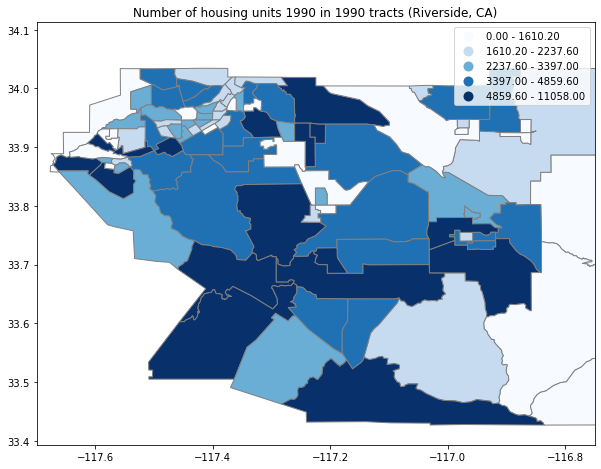

In [30]:
f, ax = plt.subplots(1, figsize=(10, 10))
rc9090.plot(figsize=(20,20), column='n_occupied_housing_units', cmap='Blues',
             edgecolor='gray', scheme='UserDefined',
             classification_kwds={'bins':q5.bins},ax=ax, legend=True)
ax.set_xlim(-117.7,-116.75)
plt.title("Number of housing units 1990 in 1990 tracts (Riverside, CA)")
plt.show()

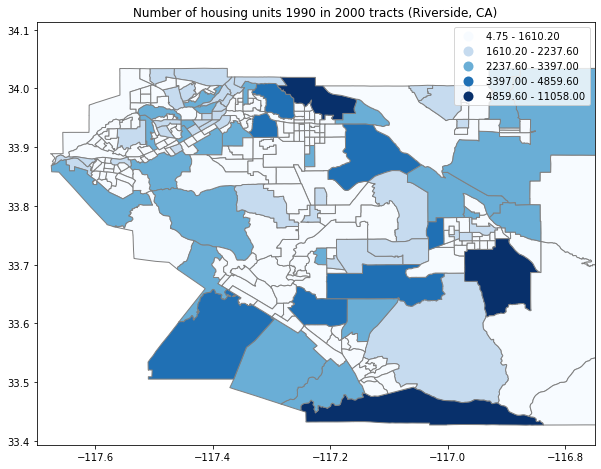

In [31]:
f, ax = plt.subplots(1, figsize=(10, 10))
rc9000.plot(figsize=(20,20), column='n_occupied_housing_units', cmap='Blues',
             edgecolor='gray', scheme='UserDefined',
             classification_kwds={'bins':q5.bins},ax=ax, legend=True)
ax.set_xlim(-117.7,-116.75)
plt.title("Number of housing units 1990 in 2000 tracts (Riverside, CA)")

plt.show()

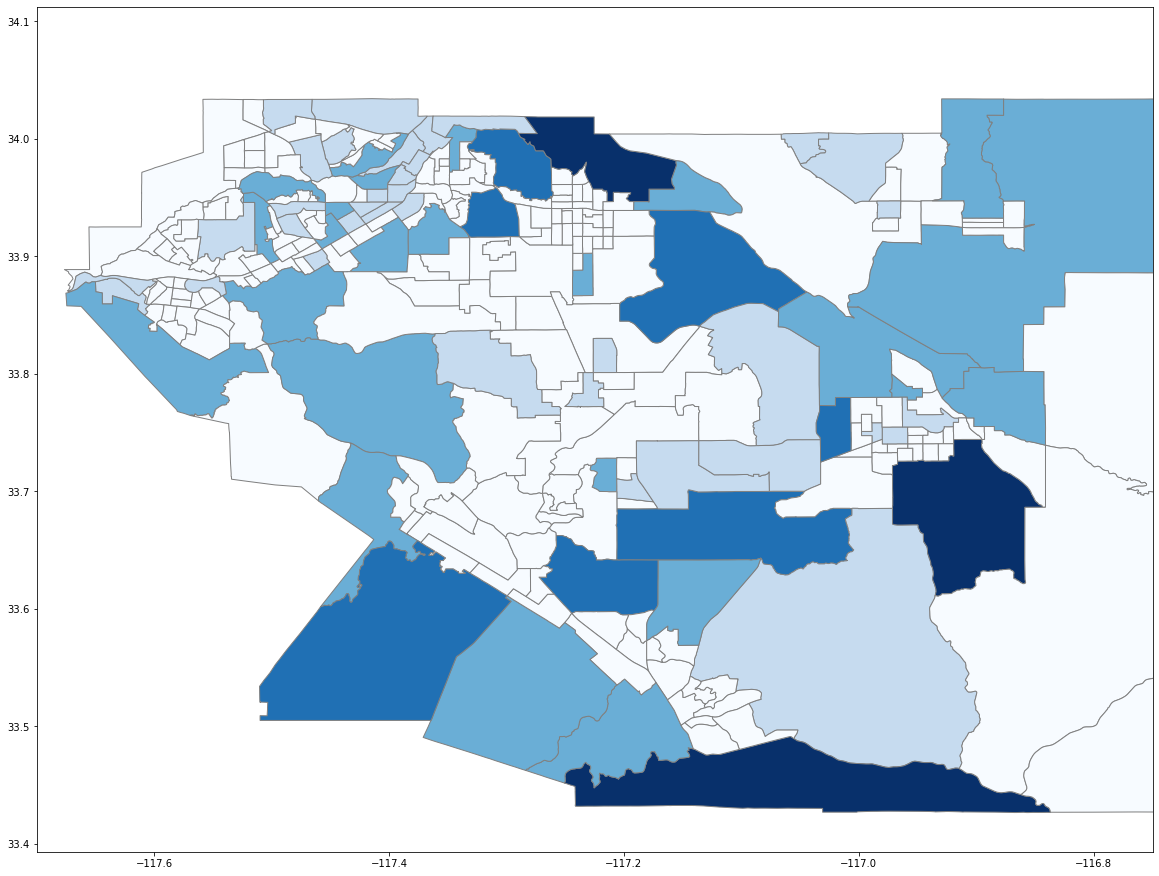

In [32]:
f, ax = plt.subplots(1, figsize=(20, 20))
rc9000.plot(figsize=(20,20), column='n_occupied_housing_units', cmap='Blues',
             edgecolor='gray', scheme='UserDefined',
             classification_kwds={'bins':q5.bins},ax=ax)
ax.set_xlim(-117.7,-116.75)
plt.show()

In [33]:
rc9090.n_occupied_housing_units.sum()

402067.0

In [34]:
rc9000.n_occupied_housing_units.sum()

402066.9991353667

In [35]:
rc9090.shape == rc9000.shape

False

## Intensive Variable

In [36]:
riverside = Community.from_census(fips='06065')

In [37]:
rc = copy.copy(riverside)

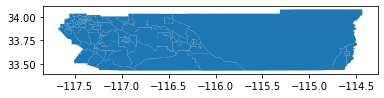

In [38]:
r9090 = riverside.gdf[riverside.gdf.year==1990]
r9090.plot()

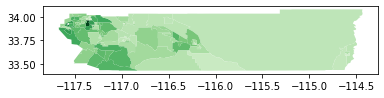

In [39]:
r9090.plot(column='median_household_income', cmap='Greens')

In [40]:
intensive = ['median_household_income']

In [41]:
rc2000h = riverside.harmonize(target_year=2000, weights_method='area', intensive_variables=intensive)

nan values in variable: median_household_income, replacing with 0.0


In [42]:
q5 = mc.Quantiles(riverside.gdf.median_household_income, k=5)
q5

/opt/conda/lib/python3.7/site-packages/mapclassify/classifiers.py:320: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/opt/conda/lib/python3.7/site-packages/mapclassify/classifiers.py:320: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <= 32162.413               368
32162.413 < x[i] <= 41909.335               184
41909.335 < x[i] <= 53226.000               184
53226.000 < x[i] <= 71649.635               184
71649.635 < x[i] <=       nan                 0

In [43]:
rc2000h.gdf.median_household_income.max()

174369.235444183

In [44]:
rc9090.median_household_income.max()

76038.0

In [45]:
q5 = mc.Quantiles(rc2000h.gdf.median_household_income, k=5)
q5

                    Quantiles                    
 
  Lower                Upper                Count
             x[i] <=  29275.307               206
 29275.307 < x[i] <=  38342.117               206
 38342.117 < x[i] <=  46967.867               205
 46967.867 < x[i] <=  61288.483               206
 61288.483 < x[i] <= 174369.235               206

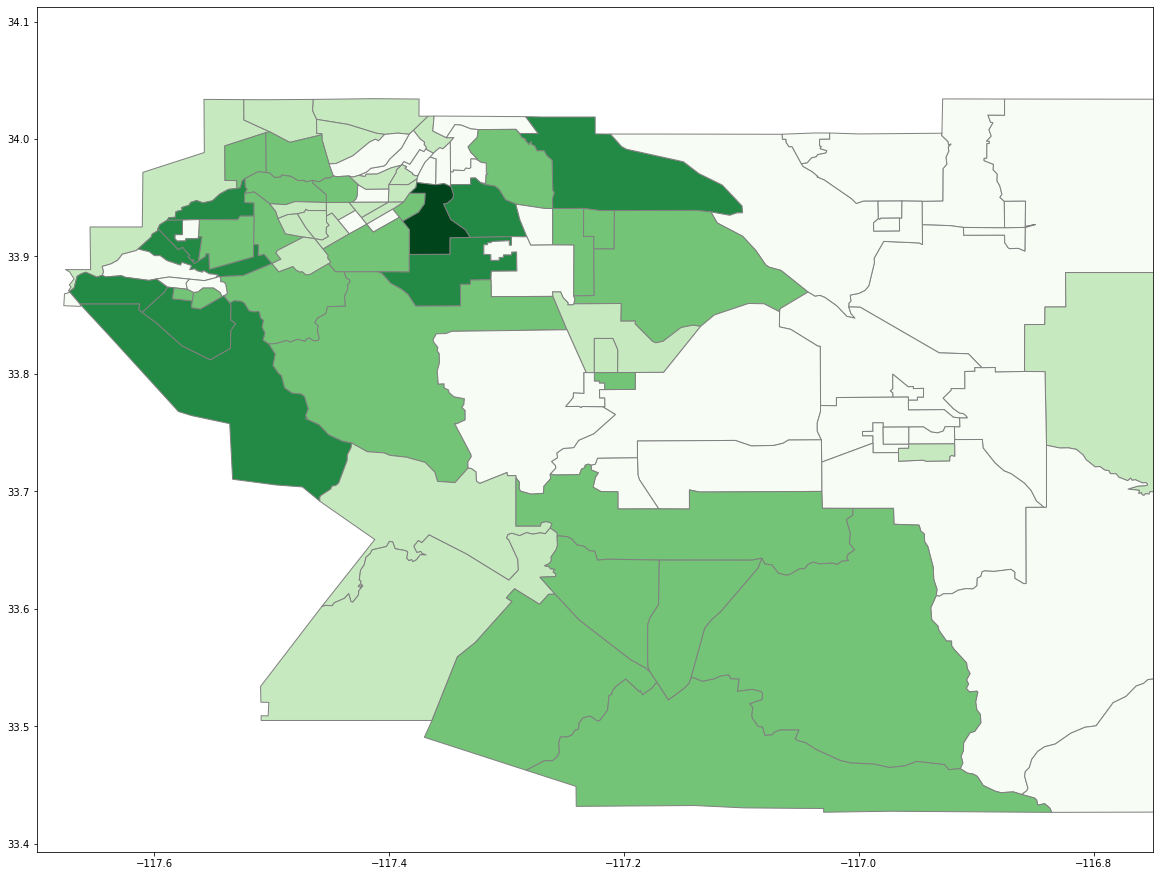

In [46]:
f, ax = plt.subplots(1, figsize=(20, 20))
rc9090.plot(figsize=(20,20), column='median_household_income', cmap='Greens',
             edgecolor='gray', scheme='UserDefined',
             classification_kwds={'bins':q5.bins},ax=ax)
ax.set_xlim(-117.7,-116.75)
plt.show()

In [47]:
rc9000 = rc2000h.gdf[rc2000h.gdf.year==1990]

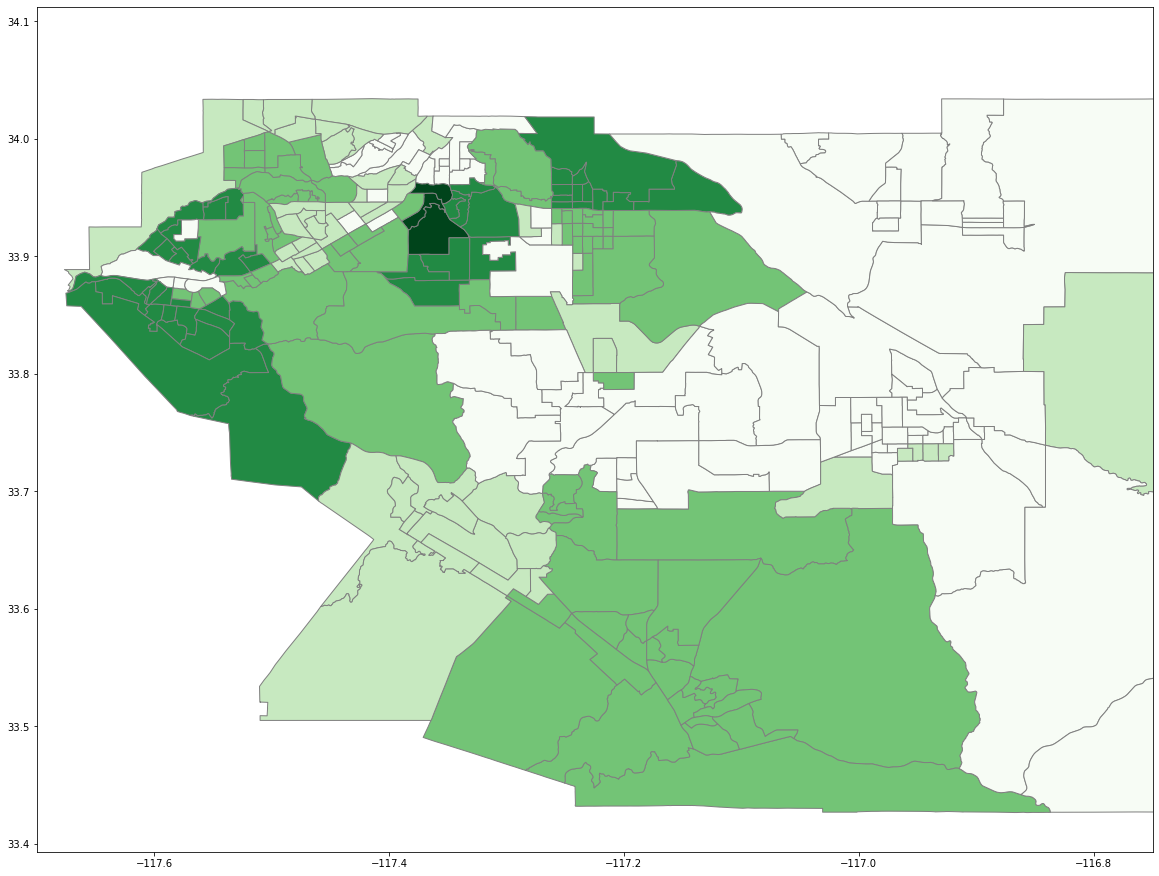

In [48]:
f, ax = plt.subplots(1, figsize=(20, 20))
rc9000.plot(figsize=(20,20), column='median_household_income', cmap='Greens',
             edgecolor='gray', scheme='UserDefined',
             classification_kwds={'bins':q5.bins},ax=ax)
ax.set_xlim(-117.7,-116.75)
plt.show()

## Boundaries

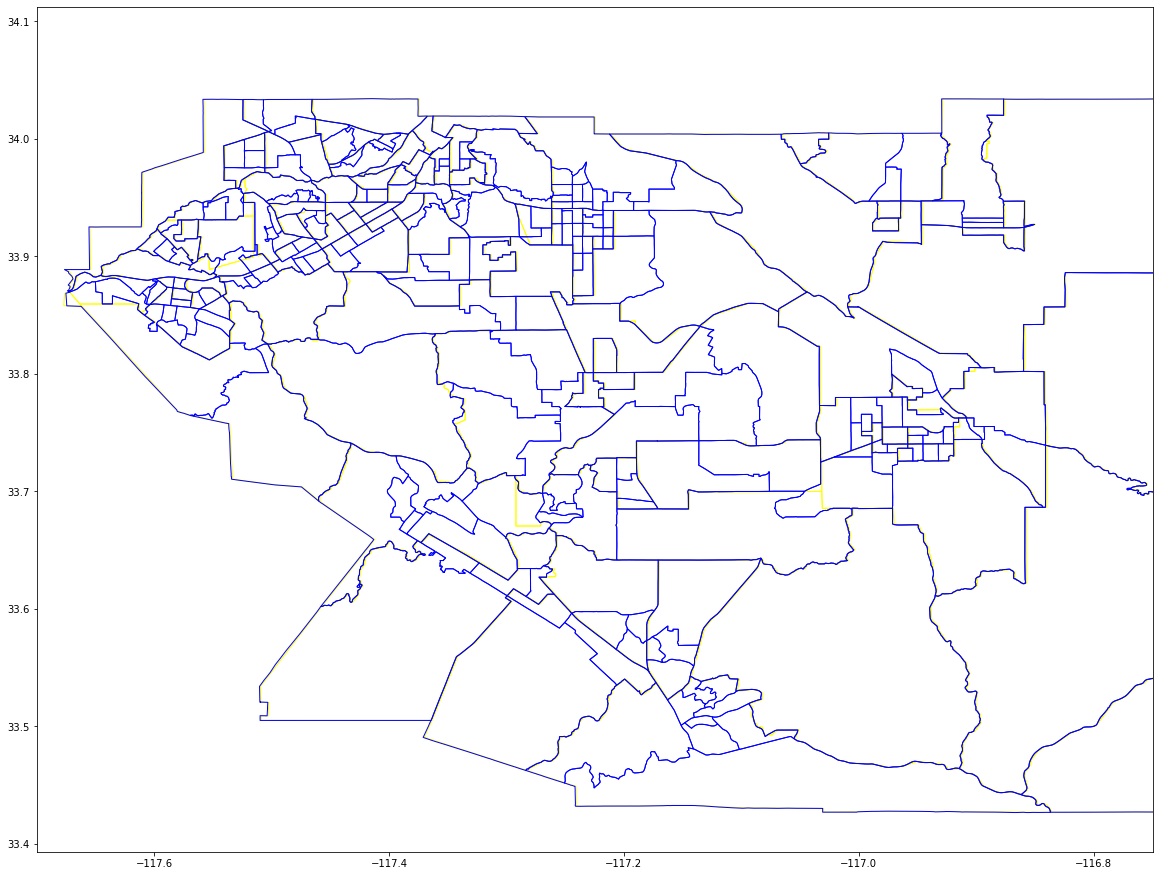

In [49]:
f, ax = plt.subplots(1, figsize=(20, 20))

rc9090.plot(figsize=(20,20), facecolor='none',
             edgecolor='yellow',
             ax=ax)
rc9000.plot(figsize=(20,20), facecolor='none',
             edgecolor='blue',
             ax=ax)

ax.set_xlim(-117.7,-116.75)
plt.show()

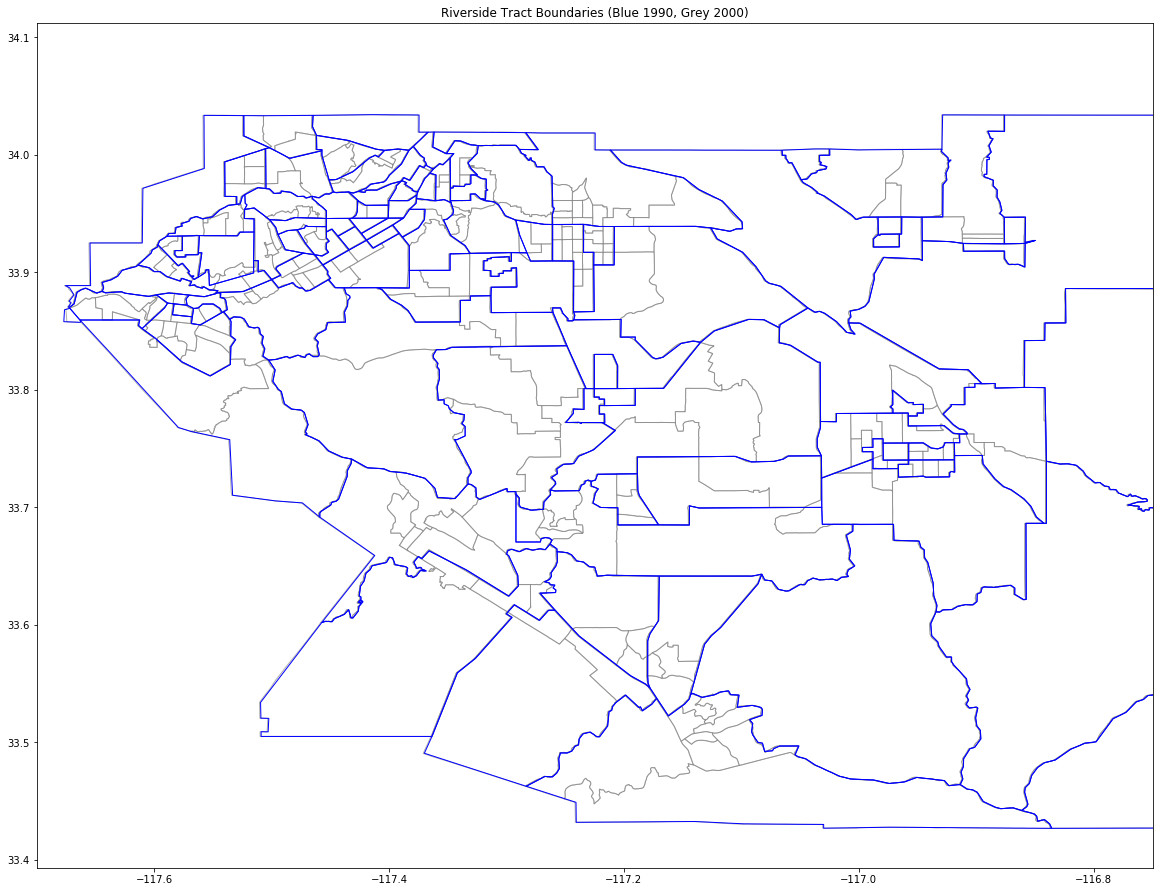

In [50]:
f, ax = plt.subplots(1, figsize=(20, 20))


rc9000.plot(figsize=(20,20), facecolor='none',alpha=100,
             edgecolor='grey',
             ax=ax)
rc9090.plot(figsize=(20,20), facecolor='none',
             edgecolor='blue',
             ax=ax)

ax.set_xlim(-117.7,-116.75)
plt.title("Riverside Tract Boundaries (Blue 1990, Grey 2000)")
plt.show()

In [51]:
q5_all = mc.Quantiles(riverside.gdf.median_household_income, k=5)
q5_all

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <= 32162.413               368
32162.413 < x[i] <= 41909.335               184
41909.335 < x[i] <= 53226.000               184
53226.000 < x[i] <= 71649.635               184
71649.635 < x[i] <=       nan                 0

In [52]:
import pandas as pd


In [53]:

pd.isna(riverside.gdf.median_household_income).sum()

2

In [54]:
r = riverside.gdf

In [55]:
q5all = mc.Quantiles(r[~r.median_household_income.isna()].median_household_income, k=5)
q5all

                    Quantiles                    
 
  Lower                Upper                Count
             x[i] <=  32143.238               184
 32143.238 < x[i] <=  41894.044               183
 41894.044 < x[i] <=  53224.000               185
 53224.000 < x[i] <=  71395.568               182
 71395.568 < x[i] <= 175449.657               184